# Kaggle1_StudyGroup

https://www.kaggle.com/c/competitive-data-science-predict-future-sales

<b>Predict Future Sales <br/>
    Final project for "How to win a data science competition" Coursera course</b>

<mark><b>Objective:</b> predict total sales for <i>every product</i> and <i>store</i> in the <i>next month</i>.<br/></mark>
<b>Dataset: </b> time-series consisting of daily sales data, provided by one of the largest Russian software firms - 1C Company. 

Submissions are evaluated by root mean squared error (RMSE). True target values are clipped into [0,20] range. <br/>
<b>Submission File</b><br/>
For each id in the test set, you must predict a total number of sales. The file should contain a header and have the following format:

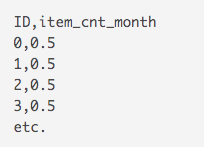

<b>File descriptions </b>

sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.<br />
test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.<br />
sample_submission.csv - a sample submission file in the correct format.<br />
x items.csv - supplemental information about the items/products.<br />
x item_categories.csv  - supplemental information about the items categories.<br />
x shops.csv- supplemental information about the shops.<br />

<b>Data fields</b>

ID - an Id that represents a (Shop, Item) tuple within the test set  <br />
shop_id - unique identifier of a shop  <br />
item_id - unique identifier of a product<br />
item_category_id - unique identifier of item category<br />
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure<br />
item_price - current price of an item<br />
date - date in format dd/mm/yyyy<br />
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33<br />
item_name - name of item<br />
shop_name - name of shop<br />
item_category_name - name of item category<br />

In [1]:
import kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
items = pd.read_csv('data/items.csv') #['item_name', 'item_id', 'item_category_id']
category = pd.read_csv('data/item_categories.csv') #['item_category_name', 'item_category_id']
sales_train = pd.read_csv('data/sales_train.csv.gz') #['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       #'item_cnt_day']
sample1 = pd.read_csv('data/sample_submission.csv.gz') #['ID', 'item_cnt_month']
shops = pd.read_csv('data/shops.csv') #['shop_name', 'shop_id']
test = pd.read_csv('data/test.csv.gz') #['ID', 'shop_id', 'item_id']

In [11]:
shops.columns

Index(['shop_name', 'shop_id'], dtype='object')

###### Quantidade de Itens = 22.170 <br/>
Quantidade de Categorias = 84<br/>
Entradas de Vendas = 2.935.849<br/>
Quantidade de dias = 1.034<br/>
São 60 lojas diferentes, todas as lojas vendem<br/>
<br/>
Maior número de vendas em 1 dia = 2169, ID 11373, Доставка до пункта выдачи (Boxberry), custa 0.908714 nesse dia 28.10.2015 <br/>
    -max(sales_train['item_cnt_day'])<br/>
    -sales_train[sales_train['item_cnt_day']==2169]<br/>
    -item_category[item_category['item_id']==11373]<br/>

###### Novas colunas <br/>

<b>items_category2</b><br/>
['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_name', 'item_name', 'item_category_id'] </br>

<b>test_category</b><br/>
       ['ID', 'shop_id', 'item_id', 'item_name', 'item_category_id']<br/>
       
<b>sold_items</b> Group By item<br/> 
       ['item_id', 'item_cnt_day']<br/>

In [22]:
#juntando os items com as categorias
dataset0 = pd.merge(left=category, right=items, on="item_category_id")
dataset0.columns

item_category = dataset0[['item_category_name', 'item_name', 'item_category_id', 'item_id']]

#merge sales_train + item_category
#colunas
# Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
#      'item_cnt_day', 'item_category_name', 'item_name', 'item_category_id'],
#     dtype='object')
items_category2 = sales_train.merge(item_category, on='item_id')

In [23]:
#todos os itens da historia

sold_items2 = items_category2[['item_id', 'item_cnt_day']]
sold_items = sold_items2.groupby('item_id').sum()
sold_items.sort_values(by='item_cnt_day')

item_cnt_day
item_id              
1590            -11.0
13474            -1.0
11871            -1.0
18062            -1.0
13477             0.0
7547              0.0
8515              0.0
4591              0.0
7181              1.0
7189              1.0
7167              1.0
7163              1.0
7200              1.0
7217              1.0
7219              1.0
7222              1.0
7174              1.0
0                 1.0
7160              1.0
7237              1.0
7238              1.0
7239              1.0
7240              1.0
7241              1.0
7277              1.0
7283              1.0
7291              1.0
7329              1.0
7234              1.0
7158              1.0
...               ...
3183           5991.0
5272           6002.0
6497           6141.0
11370          6163.0
16790          6219.0
5821           6244.0
6740           6270.0
3733           6506.0
5823           6523.0
6503           6548.0
11373          6563.0
1830           6975.0
2814           7105.0
6738           7351.0
4870           7551.0
2308           7588.0
2445           7788.0
3331           8262.0
4181           8869.0
7856           9012.0
16787          9227.0
1855          10032.0
3731          10099.0
6675          10289.0
3734          11688.0
5822          14515.0
17717         15830.0
3732          16642.0
2808          17245.0
20949        187642.0

[21807 rows x 1 columns]

In [19]:
#juntando test e items pra ter categoria
test_category = test.merge(items, on='item_id')
test_category.drop(columns='item_name')

ID  shop_id  item_id  item_category_id
0            0        5     5037                19
1         5100        4     5037                19
2        10200        6     5037                19
3        15300        3     5037                19
4        20400        2     5037                19
5        25500        7     5037                19
6        30600       10     5037                19
7        35700       12     5037                19
8        40800       28     5037                19
9        45900       31     5037                19
10       51000       26     5037                19
11       56100       25     5037                19
12       61200       22     5037                19
13       66300       24     5037                19
14       71400       21     5037                19
15       76500       15     5037                19
16       81600       16     5037                19
17       86700       18     5037                19
18       91800       14     5037                19
19       96900       19     5037                19
20      102000       42     5037                19
21      107100       50     5037                19
22      112200       49     5037                19
23      117300       53     5037                19
24      122400       52     5037                19
25      127500       47     5037                19
26      132600       48     5037                19
27      137700       57     5037                19
28      142800       58     5037                19
29      147900       59     5037                19
...        ...      ...      ...               ...
214170   66299       22      969                37
214171   71399       24      969                37
214172   76499       21      969                37
214173   81599       15      969                37
214174   86699       16      969                37
214175   91799       18      969                37
214176   96899       14      969                37
214177  101999       19      969                37
214178  107099       42      969                37
214179  112199       50      969                37
214180  117299       49      969                37
214181  122399       53      969                37
214182  127499       52      969                37
214183  132599       47      969                37
214184  137699       48      969                37
214185  142799       57      969                37
214186  147899       58      969                37
214187  152999       59      969                37
214188  158099       55      969                37
214189  163199       56      969                37
214190  168299       36      969                37
214191  173399       37      969                37
214192  178499       35      969                37
214193  183599       38      969                37
214194  188699       34      969                37
214195  193799       46      969                37
214196  198899       41      969                37
214197  203999       44      969                37
214198  209099       39      969                37
214199  214199       45      969                37

[214200 rows x 4 columns]

In [21]:
test_category.columns

Index(['ID', 'shop_id', 'item_id', 'item_name', 'item_category_id'], dtype='object')

In [68]:
item_category[item_category['item_id']==1590]

item_category_name  \
2433  Игры PC - Коллекционные издания   

                                              item_name  item_category_id  \
2433  Assassin’s Creed 3. Freedom Edition [PC, русск...                29   

      item_id  
2433     1590

In [38]:
test_unique_items = test_category['item_id']
len(test_unique_items.unique())

5100

In [5]:
#soma de vendas por shop

shop_sum_price = items_category2.groupby(['shop_id'])[['item_price']].sum()

In [31]:
items_category2.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_name', 'item_name', 'item_category_id'],
      dtype='object')

In [34]:
#5 primeiros itens de cada categoria

five_items_in_category = items_category2.groupby(['item_category_id'])[['item_cnt_day','item_price', 'item_name']].sum()

In [49]:
pd.options.display.max_rows = 10000

In [50]:
#Número de vendas por categoria

category_count = items_category2.groupby(['item_category_id', 'item_name'])[['item_cnt_day','item_price',]].sum()
category_count


item_cnt_day  \
item_category_id item_name                                                          
0                Наушники PHILIPS SBC HC8680                                  1.0   
                 Наушники RITMIX RH-120                                       1.0   
                 Наушники RITMIX RH-124 Black                                 1.0   
1                PS2: Карта памяти 8 Мб черная (Memory Card 8Mb ...           1.0   
                 Pelican. Геймпад Nerf Wireless Controller PS2 (...           1.0   
2                PS Move Controller (Контроллер движений)                     1.0   
                 PS Move Gun Attachment (Рукоятка для PS Move Co...         143.0   
                 PS Move Motion Controller (Контроллер движений ...        1966.0   
                 PS Move Motion Controller Charger (Зарядная ста...         636.0   
                 PS Move Navigation Controller (Дополнительный к...         777.0   
                 PS Move Sharp Shooter (Рукоятка для PS Move Con...         512.0   
                 PS Move Starter Pack (Камера PS Eye + Контролле...         300.0   
                 PS3/PC: Геймпад Gioteck VX-2 беспроводной (VX2P...         289.0   
                 PS3/PC: Геймпад Gioteck VX-2 проводной (VX2PS3-...         155.0   
                 PS3/X360: Turtle Beaсh. EarForce PX21. Геймерск...          51.0   
                 PS3: Turtle Beaсh. EarForce P11. Геймерская сте...         188.0   
                 PS3: Turtle Beaсh. EarForce PLa. Геймерская сте...          49.0   
                 PS3: Гарнитура беспроводная для PS3 (Wireless S...         454.0   
                 PS3: Гарнитура беспроводная для PS3 (с поддержк...         558.0   
                 PS3: Гарнитура для PS3 (Bluetooth Headset Boxed...          39.0   
                 PS3: Геймпад Gioteck SC-1 спортивный беспроводн...         140.0   
                 PS3: Геймпад Gioteck VX-1 беспроводной (VX1PS3-...         220.0   
                 PS3: Геймпад Madcatz MLG Pro-Circuit проводной ...          17.0   
                 PS3: Джойстик Dual SFX Frag Pro/Shark (беспрово...           2.0   
                 PS3: Джойстик Frag FX Piranha красный (проводно...           1.0   
                 PS3: Зарядная станция Gioteck AC-1 Ammo Clip по...         254.0   
                 PS3: Кабель HDMI Artplays 2 м (ver. 1.4) блистер           810.0   
                 PS3: Кабель HDMI IT 1.8м Defender PRO (ver. 1.4)           322.0   
                 PS3: Кабель HDMI IT 3м Defender PRO (ver. 1.4)             107.0   
                 PS3: Комплект «Контроллер черный (DS Wireless B...         136.0   
                 PS3: Комплект «Контроллер черный (DS Wireless B...         422.0   
                 PS3: Контроллер игровой беспроводной God of War...         193.0   
                 PS3: Контроллер игровой беспроводной белый (Dua...         157.0   
                 PS3: Контроллер игровой беспроводной золотой (D...           6.0   
                 PS3: Контроллер игровой беспроводной камуфляжны...         227.0   
                 PS3: Контроллер игровой беспроводной красный (D...          91.0   
                 PS3: Контроллер игровой беспроводной красный (D...         140.0   
                 PS3: Контроллер игровой беспроводной красный (D...         225.0   
                 PS3: Контроллер игровой беспроводной красный (D...          65.0   
                 PS3: Контроллер игровой беспроводной прозрачный...         708.0   
                 PS3: Контроллер игровой беспроводной серебристы...         233.0   
                 PS3: Контроллер игровой беспроводной серый (Dua...         288.0   
                 PS3: Контроллер игровой беспроводной серый мета...         969.0   
                 PS3: Контроллер игровой беспроводной синий (Dua...         203.0   
                 PS3: Контроллер игровой беспроводной синий (Dua...         432.0   
                 PS3: Контроллер игровой беспроводной синий (Dua...       

In [ ]:
category_count = items_category2.groupby(['item_category_id'])[['item_cnt_day','item_price']].sum()
category_count.sort_values(by='item_price', ascending=False)

In [9]:
#merge sales_train + item_category
#colunas
# Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
#      'item_cnt_day', 'item_category_name', 'item_name', 'item_category_id'],
#     dtype='object')
items_category2 = sales_train.merge(item_category, on='item_id')

In [24]:
#agrupar vendas por loja em dinheiro
shop_sum_price = items_category2.groupby(['shop_id'])[['item_price']].sum()
shop_sum_price.sort_values(by='item_price')

item_price
shop_id              
36       3.568190e+05
11       4.798425e+05
8        2.226273e+06
20       2.389266e+06
1        2.926161e+06
40       4.080156e+06
9        4.714303e+06
23       5.023142e+06
32       5.098652e+06
13       5.333601e+06
0        5.553869e+06
33       5.594080e+06
34       7.695497e+06
39       1.501239e+07
10       1.644284e+07
49       1.833824e+07
55       2.113586e+07
51       2.185559e+07
17       2.352167e+07
48       2.429822e+07
3        2.647262e+07
44       2.941958e+07
5        3.326088e+07
45       3.377880e+07
2        3.510444e+07
4        3.533539e+07
14       3.600645e+07
59       3.726479e+07
37       3.734868e+07
52       3.764912e+07
41       3.828370e+07
30       3.885892e+07
22       4.224514e+07
43       4.275150e+07
29       4.528771e+07
53       4.792886e+07
26       4.851612e+07
16       4.871298e+07
12       5.080559e+07
21       5.147937e+07
56       5.169638e+07
38       5.360325e+07
19       5.430200e+07
15       5.559759e+07
7        5.607710e+07
24       5.628828e+07
35       5.682312e+07
58       5.846344e+07
46       6.093469e+07
18       6.251643e+07
47       6.280522e+07
50       6.335695e+07
6        7.455831e+07
57       9.131521e+07
42       1.015515e+08
27       1.056489e+08
54       1.096694e+08
28       1.252947e+08
25       1.555576e+08
31       1.707634e+08

In [12]:
#quantidade de dias
datas = sales_train.date
datas_u = datas.unique()
datas_u.size

1034